In [1]:
import client
import ontology_parser as op
import ontology_formatter as of
import openai_parser as oap
import datetime
import json

In [2]:
def is_json(myjson):
  try:
    json.loads(myjson)
  except ValueError as e:
    return False
  return True

In [3]:
namespace = "http://www.semanticweb.org/ontologies/2024/11/curie"
prefix = "cur"
text_to_extract = """
    Marie Curie, 7 November 1867 - 4 July 1934, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
    She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
    Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.
    She was, in 1906, the first woman to become a professor at the University of Paris.
    """

namespaces = {
    prefix: f"{namespace}#",
    "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
    "rdfs": "http://www.w3.org/2000/01/rdf-schema#"
}


In [4]:
cnc, pnc = op.parse('ontologies/curie.ttl', namespace)
formatted_classes = of.format_classess(cnc, namespace, prefix)
formatted_properties = of.format_properties(pnc, namespace, prefix)

# JSON testing

In [5]:
LOOP_LIMIT = 100

In [6]:
all_subjects = []
correct_subject_count = 0
for i in range(LOOP_LIMIT):
    subjects = client.get_subjects(formatted_classes, text_to_extract)
    try:
        subs = json.loads(subjects)
        if len(subs) > 0:
            correct_subject_count += 1
            all_subjects.append(subs)
    except:
        pass

print(f"Correct subject count: {correct_subject_count}/{LOOP_LIMIT}")

Correct subject count: 100/100


In [7]:
all_subject_classes = []
correct_subject_class_count = 0
for i in range(LOOP_LIMIT):
    for_subjects = all_subjects[i] if i < len(all_subjects) else all_subjects[-1]
    subject_classes = client.get_subject_classess(subjects, formatted_classes, text_to_extract)
    try:
        subs = json.loads(subject_classes)
        if len(subs) > 0:
            correct_subject_class_count += 1
            all_subject_classes.append(subs)
    except:
        pass


In [8]:
print(f"Correct subject class count: {correct_subject_class_count}/{LOOP_LIMIT}")

Correct subject class count: 76/100


In [9]:
all_properties = []
correct_property_count = 0
for i in range(LOOP_LIMIT):
    for_subjects = all_subjects[i] if i < len(all_subjects) else all_subjects[-1]
    properties = client.get_properties(for_subjects, formatted_properties, text_to_extract, prefix)
    try:
        props = json.loads(properties)
        if len(props) > 0:
            correct_property_count += 1
            all_properties.append(props)
    except:
        pass

print(f"Correct property count: {correct_property_count}/{LOOP_LIMIT}")

Correct property count: 88/100


# Content analysis

In [10]:
# Group subjects from all_subjects by their classes and count the number of subjects in each class
subject_count = {}
for i in range(len(all_subjects)):
    for j in range(len(all_subjects[i])):
        subject_class = all_subjects[i][j]
        if subject_class in subject_count.keys():
            subject_count[subject_class] += 1
        else:
            subject_count[subject_class] = 1

In [11]:
# Print the number of subjects in each class ordered by the number of subjects descending
print("Subject count by class:")
for key in sorted(subject_count, key=subject_count.get, reverse=True):
    print(f"{key}: {subject_count[key]}")

Subject count by class:
NobelPrize: 100
MarieCurie: 99
PierreCurie: 98
Professor: 97
Physicist: 71
Chemist: 71
Radioactivity: 65
University: 51
Polish: 33
French: 32
UniversityOfParis: 28
Physics: 25
Chemistry: 25
Woman: 19
UniversityofParis: 16
Prize: 15
MarriedCouple: 10
UniversityParis: 5
ScientificFields: 5
physicist: 4
chemist: 4
radioactivity: 4
FirstPerson: 4
CurieFamilyLegacy: 4
Paris: 3
CurieFamily: 3
NobelPrizeWinner: 2
Twice: 2
married: 1
couple: 1
Pioneer: 1
ScientificField: 1
research: 1
marriedCouple: 1
PioneerResearch: 1
FirstWomanNobelPrize: 1
MarriedCoupleNobelPrize: 1
FirstWoman: 1
TwiceNobelPrizeWinner: 1
TwoScientificFieldsWinner: 1
FirstMarriedCoupleToWinNobelPrize: 1
NaturalisedFrench: 1
TwiceWinner: 1


In [12]:
class_count_by_subject = {}
for subject in subject_count.keys():
    if subject_count[subject] < 50:
        continue

    subdict = {}
    class_count_by_subject[subject] = subdict

    for i in range(len(all_subject_classes)):
        for j in range(len(all_subject_classes[i])):
            if all_subject_classes[i][j]['subject'] == subject:
                class_name = all_subject_classes[i][j]['class']
                if class_name in subdict.keys():
                    subdict[class_name] += 1
                else:
                    subdict[class_name] = 1

In [13]:
for subject in class_count_by_subject.keys():
    print(f"Class count by subject {subject}:")
    subdict = class_count_by_subject[subject]
    for key in sorted(subdict, key=subdict.get, reverse=True):
        print(f"{key}: {subdict[key]}")
    print()

Class count by subject MarieCurie:
http://www.semanticweb.org/ontologies/2024/11/curie/Physicist: 59
http://www.semanticweb.org/ontologies/2024/11/curie/Professor: 13
http://www.semanticweb.org/ontologies/2024/11/curie/Chemist: 10
http://www.semanticweb.org/ontologies/2024/11/curie/NobelPrize: 10
http://www.semanticweb.org/ontologies/2024/11/curie/French: 3
http://www.semanticweb.org/ontologies/2024/11/curie/Polish: 3
http://www.semanticweb.org/ontologies/2024/11/curie/Scientist: 3
NobelPrize: 3
Professor: 3
Physicist: 2
Chemist: 2
Polish: 1
French: 1
curie/Physicist: 1

Class count by subject Physicist:
http://www.semanticweb.org/ontologies/2024/11/curie/Physicist: 47
None: 4
: 3
http://www.semanticweb.org/ontologies/2024/11/curie/Scientist: 2
http://www.semanticweb.org/ontologies/2024/11/curie/NobelPrize: 1
None: 1
curie/Physicist: 1
http://www.semanticweb.org/ontologies/2024/11/curie/ScientificField: 1
none: 1
http://www.semanticweb.org/ontologies/2024/11/curie/: 1
http://www.semant

In [14]:
length_all_subjects = [len(subjects) for subjects in all_subjects]
length_all_subject_classes = [len(subject_classes) for subject_classes in all_subject_classes]
length_all_properties = [len(properties) for properties in all_properties]

# Graphs for lengths

In [17]:
import matplotlib.pyplot as plt

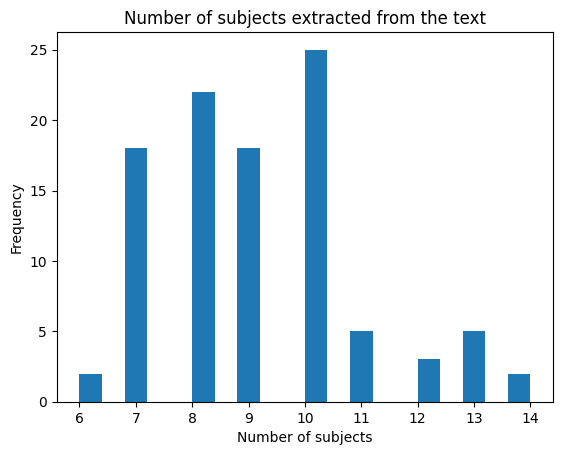

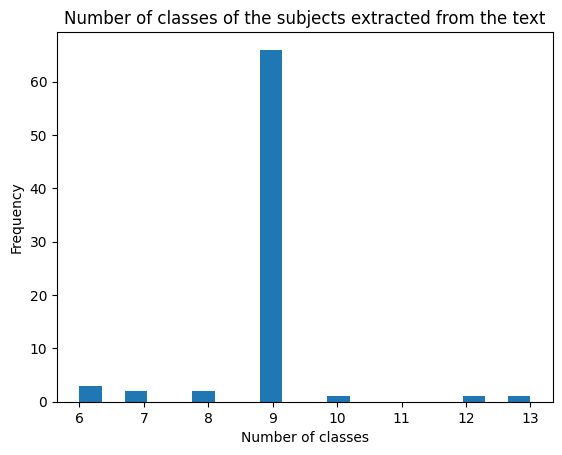

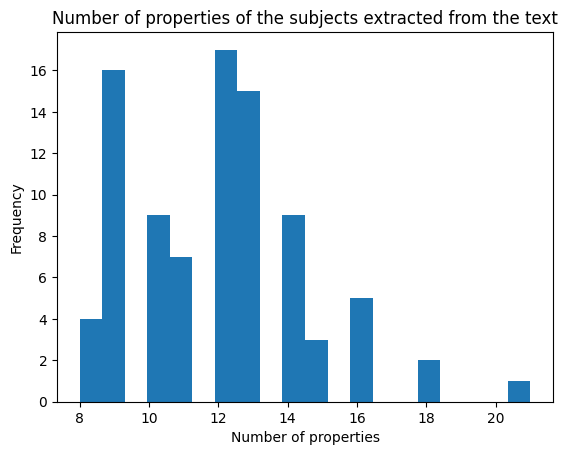

In [19]:
# Show the distribution of the number of subjects extracted from the text
plt.hist(length_all_subjects, bins=20)
plt.title("Number of subjects extracted from the text")
plt.xlabel("Number of subjects")
plt.ylabel("Frequency")
plt.show()

# Show the distribution of the number of classes of the subjects extracted from the text
plt.hist(length_all_subject_classes, bins=20)
plt.title("Number of classes of the subjects extracted from the text")
plt.xlabel("Number of classes")
plt.ylabel("Frequency")
plt.show()

# Show the distribution of the number of properties of the subjects extracted from the text
plt.hist(length_all_properties, bins=20)
plt.title("Number of properties of the subjects extracted from the text")
plt.xlabel("Number of properties")
plt.ylabel("Frequency")
plt.show()

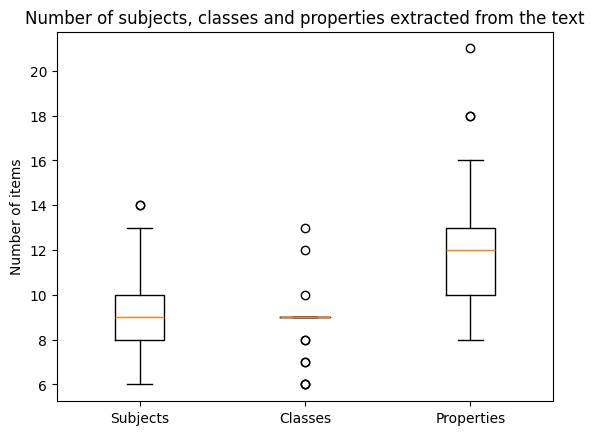

In [21]:
# Box plot of the number of subjects, classes and properties extracted from the text. All three are shown in the same plot
plt.boxplot([length_all_subjects, length_all_subject_classes, length_all_properties], tick_labels=["Subjects", "Classes", "Properties"])
plt.title("Number of subjects, classes and properties extracted from the text")
plt.ylabel("Number of items")
plt.show()
